# Cardiovascular Disease Risk Factor Analysis-Social Factors

Importing Required Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
import plotly.express as px
from xgboost import plot_tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

Reading the Dataset

In [38]:
data = pd.read_csv("/Users/rithikak/Downloads/Cardiovascular-Disease-main/Data Sets/healthcare-dataset-stroke-data.csv")
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9No46,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [39]:
print(f"Shape of Dataframe is: {data.shape}")

Shape of Dataframe is: (5110, 12)


In [40]:
print('Datatype in Each Column')
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis("Column Name")

Datatype in Each Column


,Datatype
Column Name,
id,object
gender,object
age,float64
hypertension,object
heart_disease,object
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64


In [41]:
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


Data Preprocessing

In [42]:
pd.DataFrame(data.isna().sum(), columns=["Null Values"]).rename_axis("Column Name")


,Null Values
Column Name,
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0


In [43]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)


In [44]:
other_index = data[data['gender'] =='Other'].index
data= data.drop(other_index)

In [45]:
data["smoking_status"].replace("Unknown", data["smoking_status"].mode().values[0], inplace=True)

In [46]:
pd.DataFrame(data.isna().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0


Data Visualisation 

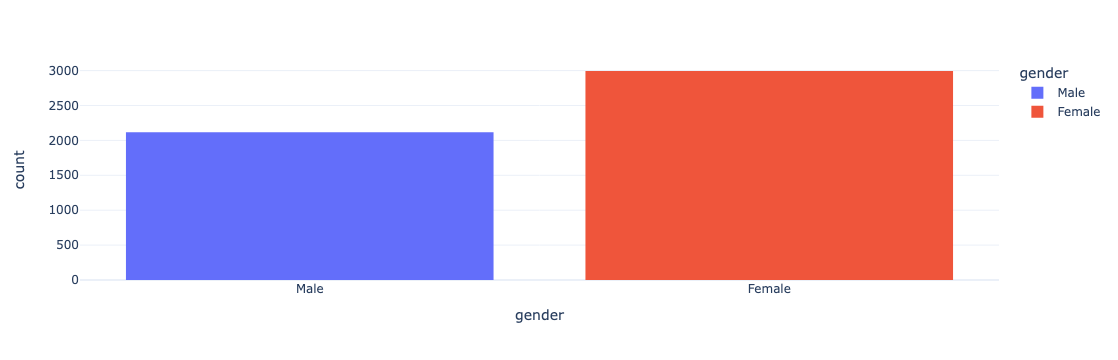

In [47]:
fig = px.histogram(data, x='gender', color='gender',template="plotly_white")
fig.show()


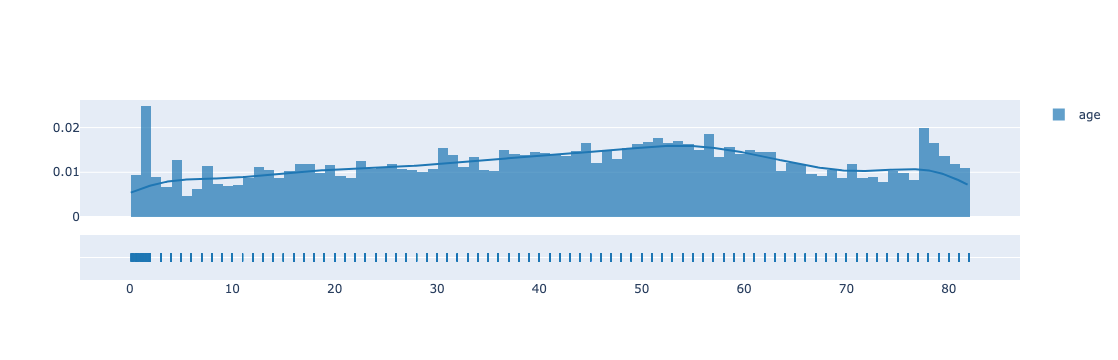

In [48]:
import plotly.figure_factory as ff
fig = ff.create_distplot([data['age']],['age'])
fig.show()

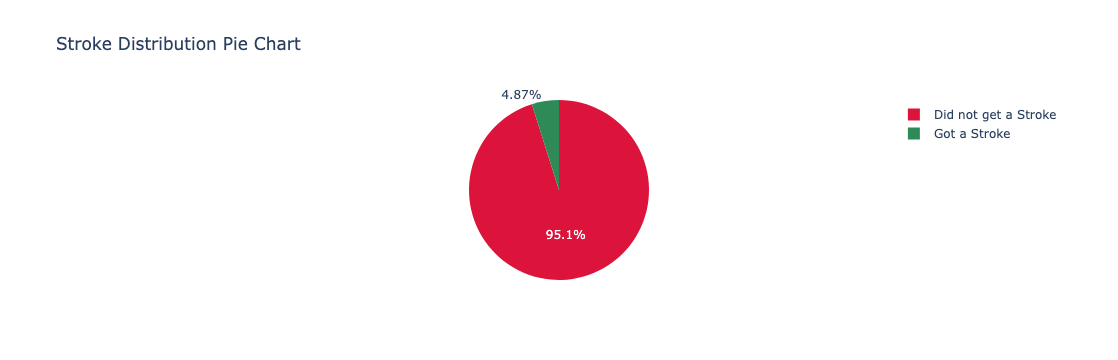

In [49]:
 labels = ["Did not get a Stroke", "Got a Stroke"]
values = data['stroke'].value_counts().tolist()
px.pie(data, values=values, names=labels, title="Stroke Distribution Pie Chart",
 color_discrete_sequence=["crimson", "seagreen"])


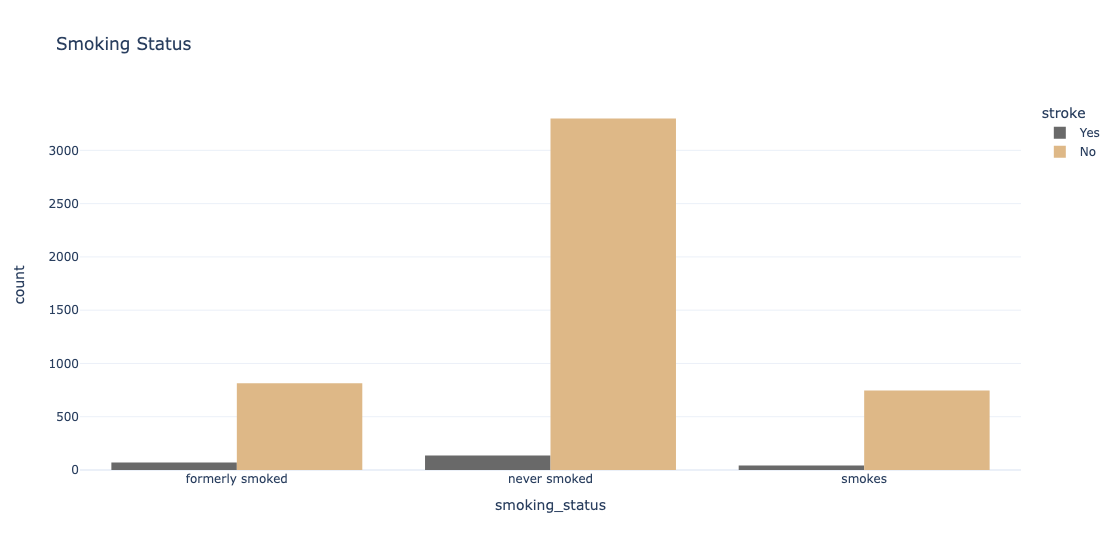

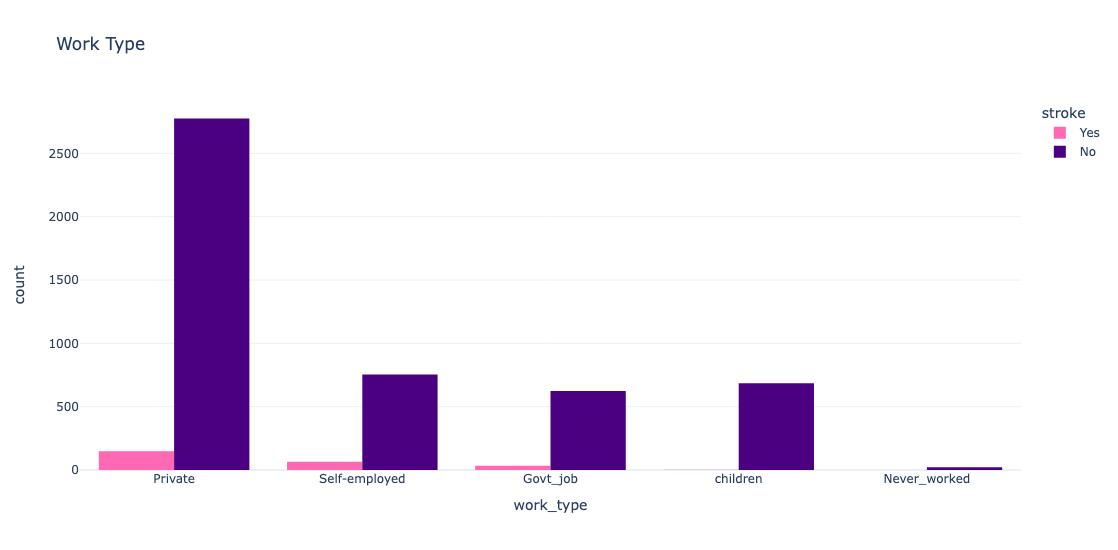

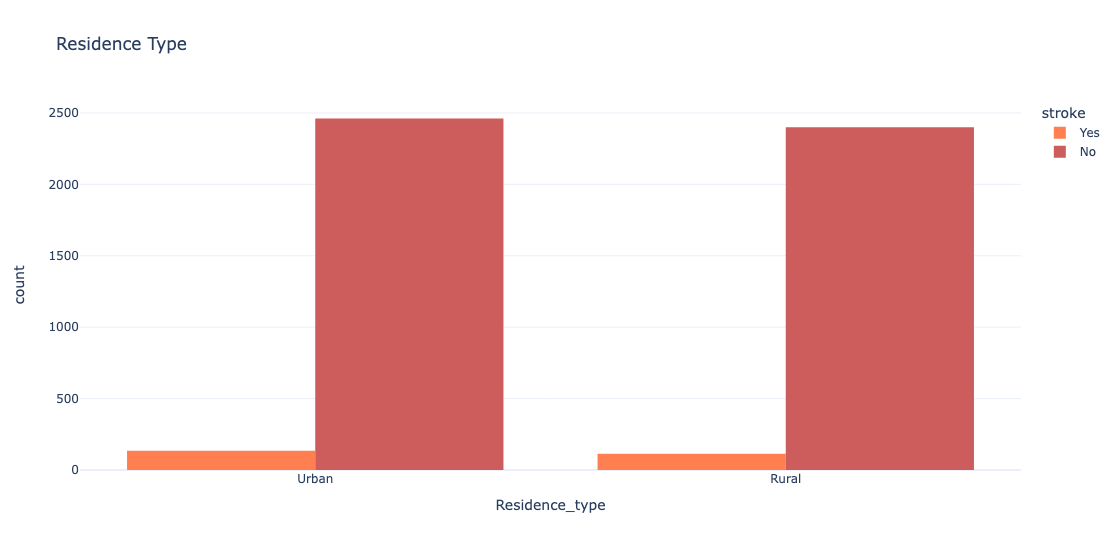

In [50]:
# barplot of smoking, work type,and residence type effect the stroke:
fig = px.histogram(data, x='smoking_status', color='stroke', barmode='group', width=550,height=550,title='Smoking Status',color_discrete_sequence= ['dimgrey','burlywood'],template="plotly_white")
fig.show()
fig = px.histogram(data, x='work_type', color='stroke', barmode='group', width=550,height=550, title='Work Type',color_discrete_sequence= ['hotpink','indigo'],template="plotly_white")
fig.show()
fig = px.histogram(data, x='Residence_type', color='stroke', barmode='group', width=550,height=550,title='Residence Type',color_discrete_sequence= ['coral','indianred'],template="plotly_white")
fig.show()


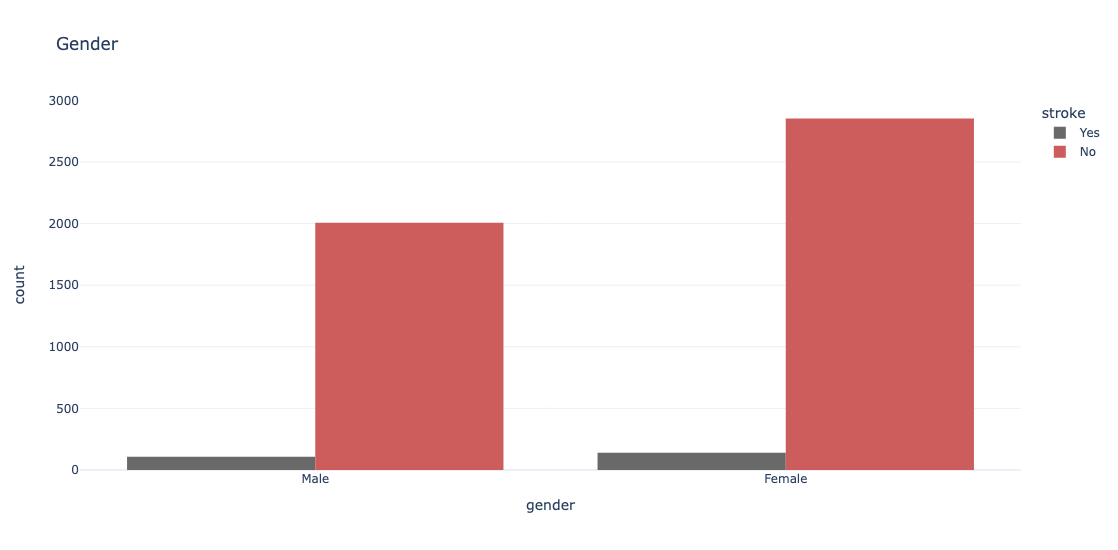

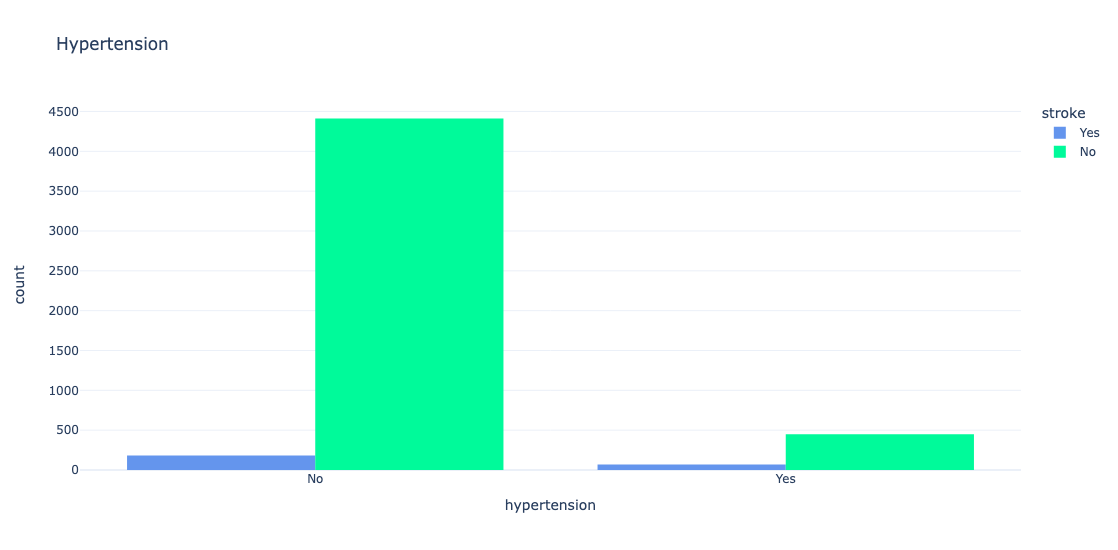

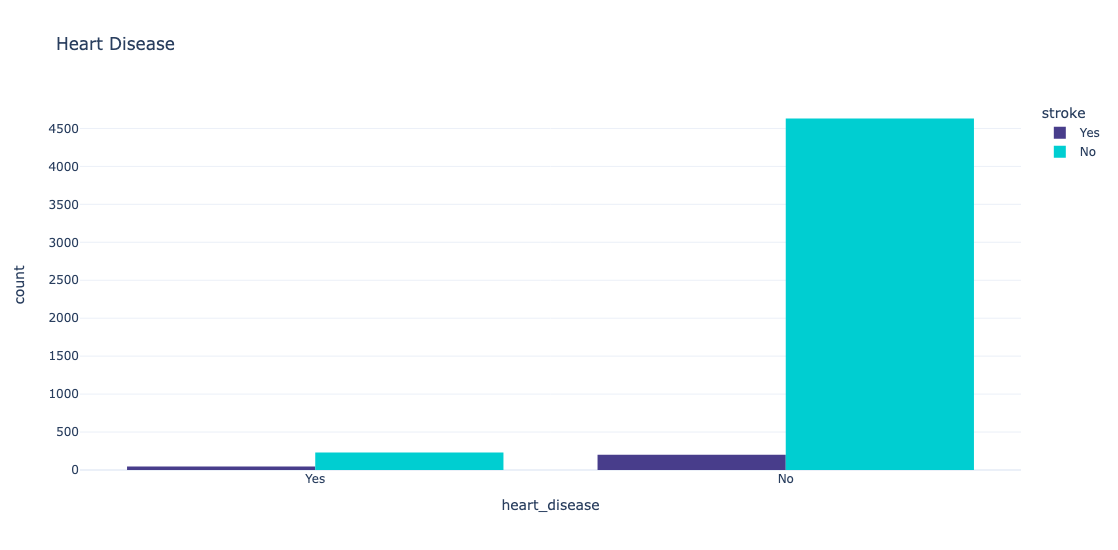

In [51]:
# barplot of gender, hypertension and any history of heart diseases effect the stroke:
fig = px.histogram(data, x='gender', color='stroke', barmode='group', width=550,height=550,title='Gender',color_discrete_sequence= ['dimgrey','indianred'],template="plotly_white")
fig.show()
fig = px.histogram(data, x='hypertension', color='stroke', barmode='group', width=550,height=550,title='Hypertension',color_discrete_sequence= ['cornflowerblue','mediumspringgreen'],template="plotly_white")
fig.show()
fig = px.histogram(data, x='heart_disease', color='stroke', barmode='group', width=550,height=550,title='Heart Disease',color_discrete_sequence= ['darkslateblue','darkturquoise'],template="plotly_white")
fig.show()

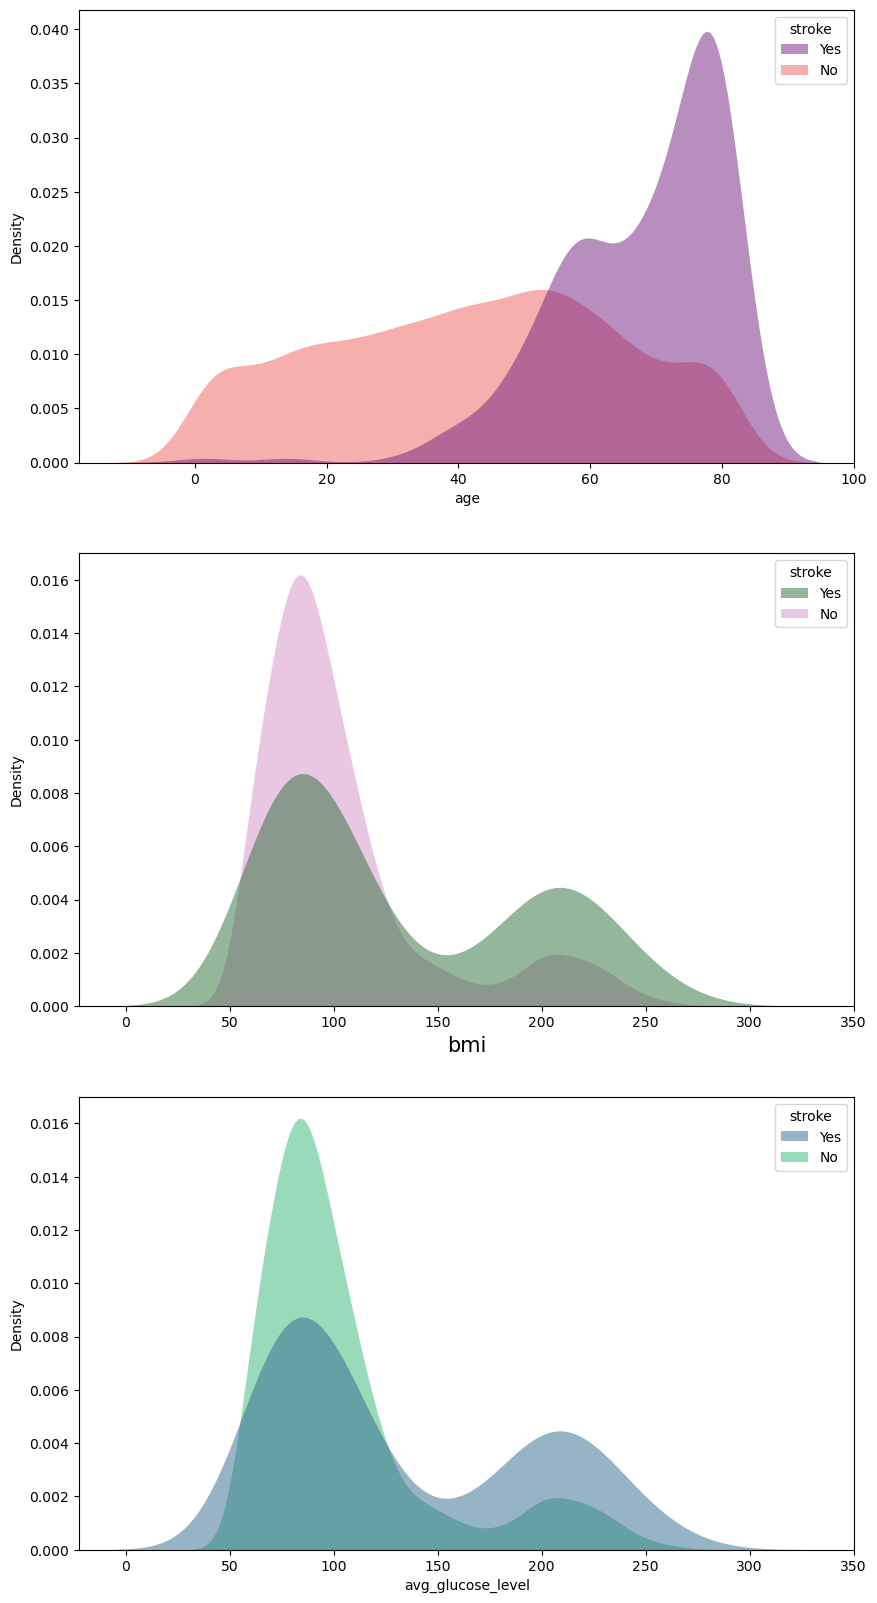

In [52]:
# Age, Average Glucose Level, BMI and their relation with stroke
fig, ax =plt.subplots(3,1, figsize=(10,20))
# Age Distribution
sns.kdeplot(x=data["age"], hue= data["stroke"], fill=True, common_norm=False, alpha=0.5, palette="magma",linewidth=0, ax=ax[0])
ax[1].set_xlabel("age",fontsize=15);
# Average Glucose Level
sns.kdeplot(x=data["avg_glucose_level"], hue= data["stroke"], fill=True, common_norm=False, palette="cubehelix",alpha=0.5, linewidth=0, ax=ax[1])
ax[1].set_xlabel("avg_glucose_level",fontsize=15);
#BMI
sns.kdeplot(x=data["avg_glucose_level"], hue= data["stroke"], fill=True, common_norm=False, palette="viridis",alpha=0.5, linewidth=0, ax=ax[2])
ax[1].set_xlabel("bmi",fontsize=15);

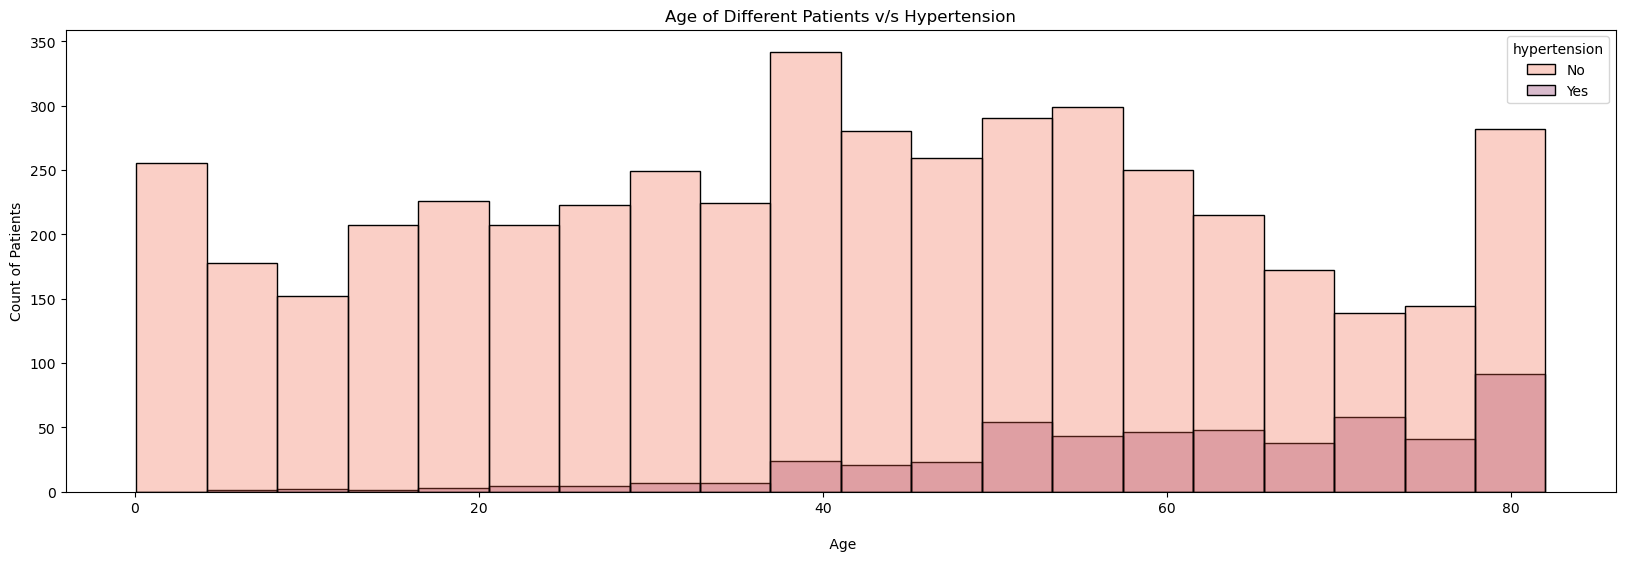

In [53]:
plt.subplots(figsize=(20,6))
sns.histplot(x=data['age'],alpha=0.3 ,hue=data['hypertension'], palette='rocket_r')
plt.xlabel('\n Age')
plt.ylabel('Count of Patients')
plt.title('Age of Different Patients v/s Hypertension')
plt.show()

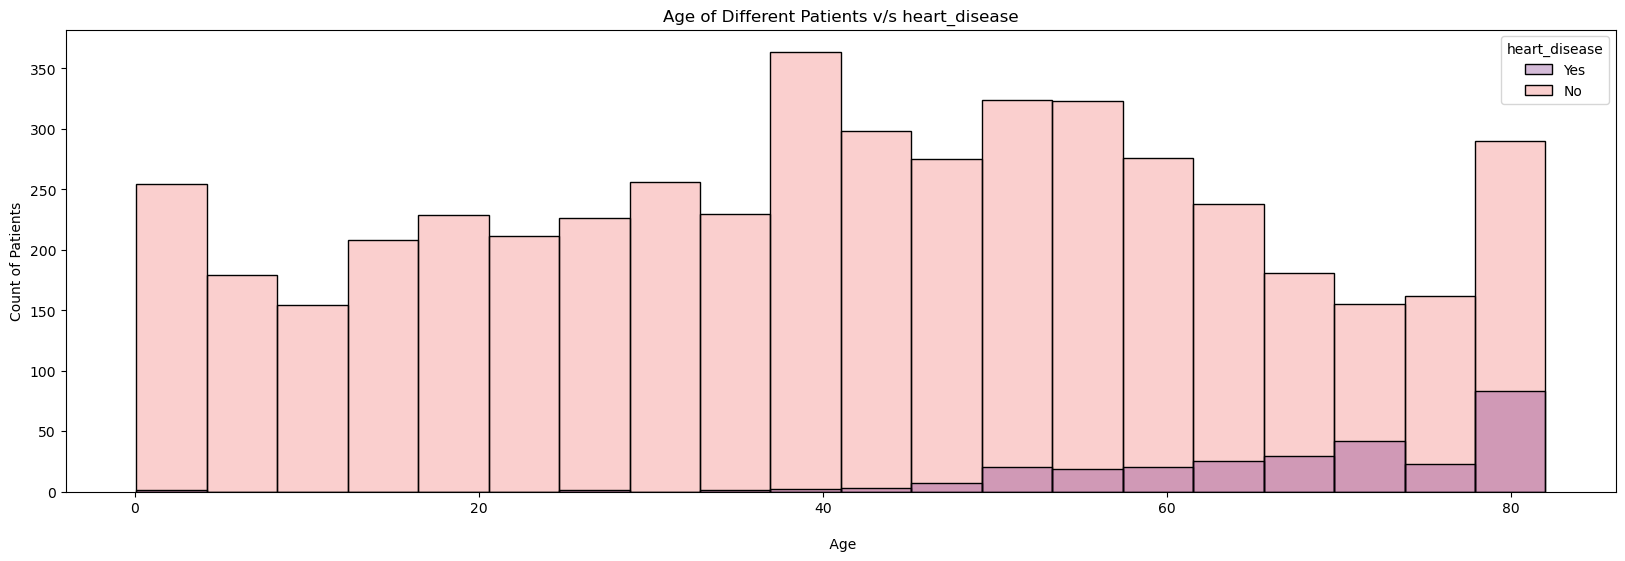

In [54]:
plt.subplots(figsize=(20,6))
sns.histplot(x=data['age'],alpha=0.3 ,hue=data['heart_disease'], palette='magma')
plt.xlabel('\n Age')
plt.ylabel('Count of Patients')
plt.title('Age of Different Patients v/s heart_disease')
plt.show()

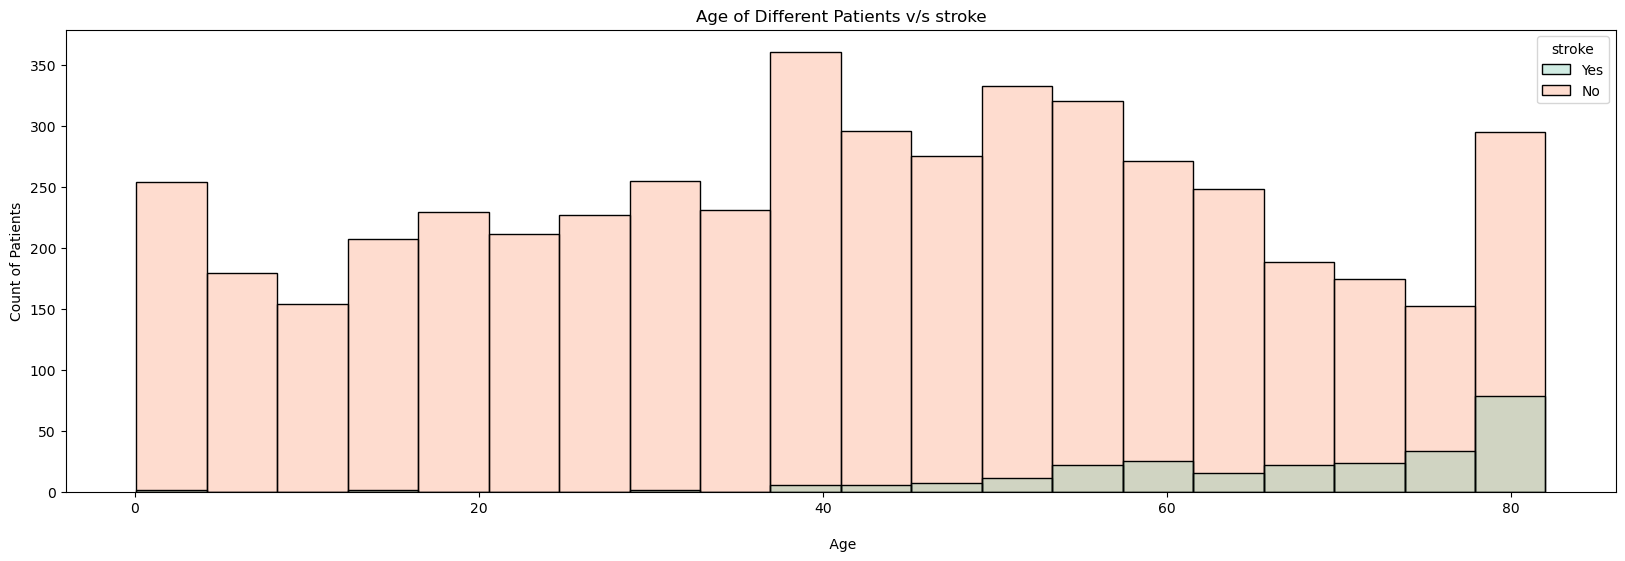

In [55]:
plt.subplots(figsize=(20,6))
sns.histplot(x=data['age'],alpha=0.3 ,hue=data['stroke'], palette='Set2')
plt.xlabel('\n Age')
plt.ylabel('Count of Patients')
plt.title('Age of Different Patients v/s stroke')
plt.show()


Machine Learning 

Splitting the data into train and test datasets

In [56]:
 #Splitting the independent variables and target variable -stroke classification
X = data.drop(["id","stroke"], axis=1)
y = data["stroke"]
y= pd.DataFrame(y,columns=["stroke"])


Encoding categorical variables

In [57]:
def genderEncoder(df):
 labelEncoder = LabelEncoder()
 df["gender"] = labelEncoder.fit_transform(df["gender"])
 df.head()
#male-1
#female-0

In [58]:
genderEncoder(data)

Standardizing the data


In [59]:
numeric_cols = X.select_dtypes(["float64","int64"])
scaler = StandardScaler()
X[numeric_cols.columns] = scaler.fit_transform(X[numeric_cols.columns])

In [60]:
numeric_cols=X[numeric_cols.columns].round(2)

In [61]:
numeric_cols.head()

,age,avg_glucose_level,bmi
0,1.05,2.71,1.00
1,0.79,2.12,-0.00
2,1.63,-0.00,0.47
3,0.26,1.44,0.72
4,1.58,1.50,-0.64


In [62]:
categorical_vbles = X.select_dtypes("object")
X = pd.get_dummies(X, columns=categorical_vbles.columns)


In [63]:
 categorical_vbles=X.round(2)

In [64]:
categorical_vbles.shape

(5109, 21)

In [65]:
data=pd.concat([categorical_vbles,y],axis=1)
data=data.dropna()

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
model_comparison = pd.DataFrame(columns=["Model","Accuracy Score"])

Logistic Regression 

In [68]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(solver = "liblinear",random_state=0)
logit.fit(X_train,y_train)
y_pred = logit.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(f"Logistic Regression: {score}")

Logistic Regression: 0.9425962165688193


In [70]:
add_model={"Model": "LogisticRegression", "Accuracy Score": round(score,4)}
model_comparison = pd.concat([model_comparison, pd.DataFrame([add_model])], ignore_index=True)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      1444
         Yes       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



K-nearest Neighbours

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
score_knn =accuracy_score(y_test, y_pred)
print(f"KNeighborsClassifier: {score_knn}")

KNeighborsClassifier: 0.9399869536855838


In [73]:
add_model={"Model": "KNeighborsClassifier", "Accuracy Score": round(score,4)}
model_comparison = pd.concat([model_comparison, pd.DataFrame([add_model])], ignore_index=True)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      1444
         Yes       0.20      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.57      0.50      0.50      1533
weighted avg       0.90      0.94      0.91      1533



Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.003)
dtc.fit(X_train,y_train)
y_Pred = dtc.predict(X_test)
score = accuracy_score(y_Pred, y_test)
print(f"DecisionTreeClassifier: {score}")

DecisionTreeClassifier: 0.9419439008480104


In [76]:
add_model={"Model": "DecisionTreeClassifier", "Accuracy Score": round(score,4)}
model_comparison = pd.concat([model_comparison, pd.DataFrame([add_model])], ignore_index=True)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      1444
         Yes       0.20      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.57      0.50      0.50      1533
weighted avg       0.90      0.94      0.91      1533



Random Forest classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=1000, random_state=30)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(f"RandomForestClassifier: {score}")

RandomForestClassifier: 0.9419439008480104


In [79]:
add_model={"Model": "RandomForestClassifier", "Accuracy Score": round(score,4)}
model_comparison = pd.concat([model_comparison, pd.DataFrame([add_model])], ignore_index=True)

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      1444
         Yes       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



Models and Accuracy Scores

In [81]:
model_comparison

,Model,Accuracy Score
0,LogisticRegression,0.9426
1,KNeighborsClassifier,0.9426
2,DecisionTreeClassifier,0.9419
3,RandomForestClassifier,0.9419


ROC Curve

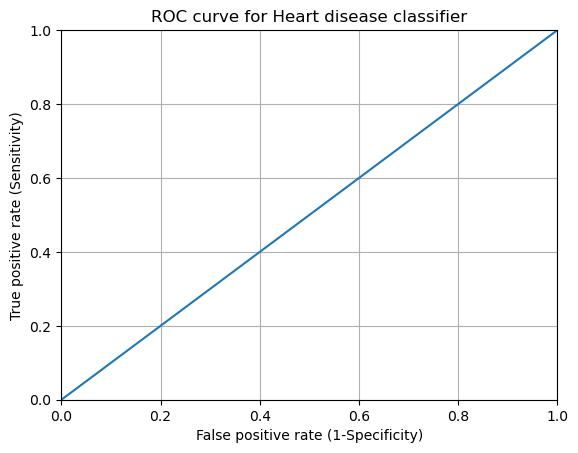

In [83]:
from sklearn.metrics import roc_curve
y_test_binary = (y_test == 'Yes').astype(int)
y_pred_binary = (y_pred == 'Yes').astype(int)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [85]:
import sklearn
sklearn.metrics.roc_auc_score(y_test_binary,y_pred_binary)

0.5